In [19]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image
import os

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [20]:
folder_name = "EEVEE_pastel_rubic" #no need for slashes
save_folder_name = "BigDataCubes/Rubic"
shape_name = "Rubic"
save_name = "Rubic"

EEVEE_pastel_rubic/0128.png


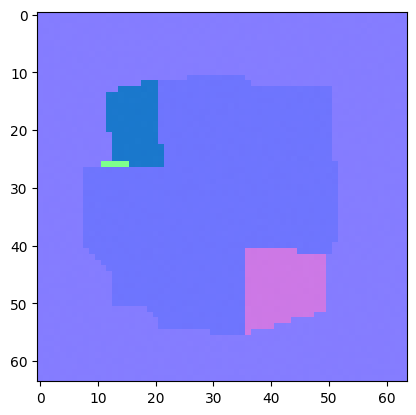

In [21]:
def GetImageAdress(input_number, additionalString = ""):
    return folder_name + "/" + additionalString + str(input_number).zfill(4) + ".png"
print(GetImageAdress(128, ""))

def GetImage(image_number,  additionalString = "" ):
    adress = GetImageAdress(image_number,  additionalString)
    image = Image.open(adress)
    image = np.array(image)
    image = image / 255
    image = image.astype('float32')
    return image
plt.imshow(GetImage(5745, "normal"))

In [22]:
answerHeadRotation = open( folder_name + "\ImageAnswers.txt", "r").read()
answerHeadRotation = answerHeadRotation.split(shape_name)
answerHeadRotation.pop(0)

answerLightRotation = open(folder_name + "\ImageData.txt", "r").read()
answerLightRotation = answerLightRotation.split("VectorXYZ")

lightframes = answerLightRotation.pop(0)
lightjump = int(lightframes.split( "NumberOfLightJumps")[1])

all_labels = list()
all_vectors = list()


for dd in range(len(answerLightRotation)):
   
    all_labels.append(answerHeadRotation[dd // lightjump])
    vector = answerLightRotation[dd].split("_")
    all_vectors.append(np.array(vector).astype("float16"))

extras_start = len(all_labels)
print(len(all_labels))

np.save((save_folder_name + '\\' + save_name + 'Labels.npy'), np.array(all_labels))
np.save((save_folder_name + '\\' + save_name + 'Vectors.npy'), np.array(all_vectors))

5700


In [23]:
all_albedos = list()
all_normals = list()
all_masks = list()
all_depth = list()
# answers start at 4775, end at 4799

print(len(answerHeadRotation))
print(answerHeadRotation[51])
for pictire in range( len(answerHeadRotation)):
    numnum = extras_start + pictire
    all_albedos.append(GetImage(numnum, "albedo"))
    all_normals.append(GetImage(numnum, "normal"))
    all_masks.append(GetImage(numnum, "mask"))
    all_depth.append(GetImage(numnum, "depth"))

print(len(all_albedos))

100
10_-51
100


In [24]:
np.save((save_folder_name + '\\' + save_name + 'RotationDegrees.npy'), np.array(answerHeadRotation))
np.save((save_folder_name + '\\' + save_name + 'Albedos.npy'), np.array(all_albedos))
np.save((save_folder_name + '\\' + save_name + 'Normals.npy'), np.array(all_normals))
np.save((save_folder_name + '\\' + save_name + 'Masks.npy'), np.array(all_masks))
np.save((save_folder_name + '\\' + save_name + 'Depth.npy'), np.array(all_depth))

In [25]:
all_photos = list()
for pictire in range( len(answerLightRotation)):
    all_photos.append(GetImage(pictire, ""))
all_photos_array = np.array(all_photos).astype('float16')
np.save(save_folder_name + '\\' + save_name + 'Photos.npy', all_photos_array)

[-0.251 -0.819  0.516] 82_-23


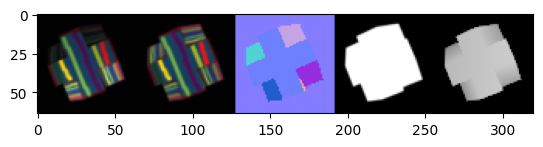

In [26]:
numnum = 5320
print(all_vectors[numnum], all_labels[numnum])
plt.imshow(np.concatenate([all_photos[numnum], all_albedos[numnum // lightjump],all_normals[numnum // lightjump],all_masks[numnum // lightjump], all_depth[numnum // lightjump]], axis=1))